<a href="https://colab.research.google.com/github/Anoop-mishra63/ML/blob/master/CW/Linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

!conda install -c anaconda xlrd --yes

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

/bin/bash: conda: command not found
Data read into a pandas dataframe!


In [2]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [3]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407


In [4]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [5]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [6]:
df_can.dtypes

Type        object
Coverage    object
OdName      object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

In [ ]:
df_can.shape
df_can.head()

In [7]:
df_can.drop(['AREA','REG','Type','Coverage','DEV'], axis='columns', inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region','DevName':'DevStatus'}, inplace=True)

df_can['Total'] = df_can.sum(axis='columns')

df_can.head()

,Country,Continent,Region,DevStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [8]:
# applying conditions on dataframe

condition = df_can['Continent'] == 'Asia'

df_can[condition]

,Country,Continent,Region,DevStatus,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
8,Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310
11,Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,17,18,23,26,38,62,54,77,98,186,167,230,359,236,203,125,165,209,138,161,57,2649
13,Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,2,10,9,6,9,9,11,14,10,17,28,14,27,34,13,17,15,12,12,12,22,9,35,28,21,39,32,475
14,Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
20,Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487,5876
25,Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,16,103,63,44,65,31,36,14,17,4,6,1,3,6,3,4,6,3,4,5,11,10,5,12,6,3,6,600
30,Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,14,15,27,34,38,93,418,371,286,216,313,241,165,245,259,230,277,348,370,529,460,354,203,200,196,233,288,6538
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
37,"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,257,400,470,379,430,446,536,729,712,674,897,657,623,591,728,774,9327


In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [13]:
years = range(1980,2014)
indopak = df_can.loc[['India','Pakistan'],years]
indopak

KeyError: ignored

In [12]:
years = range(1980,2014)
indopak = df_can.loc[['India','Pakistan'],years]
indopak
indopak.plot(
    kind='line',
    figsize=(10,10)
)

plt.title('Immigration to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.text(1994,22000,"Peak")
plt.show()

KeyError: ignored

In [15]:
years = range(1980,2014)
indopak = df_can.loc[['India','Pakistan'],years]

indopak1 = indopak.transpose()

indopak1

indopak1.plot(
    kind='line',
    figsize=(10,10)
)

plt.title('Immigration to Canada from India and Pakistan 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.text(1994,22000,"Peak")
plt.show()

KeyError: ignored

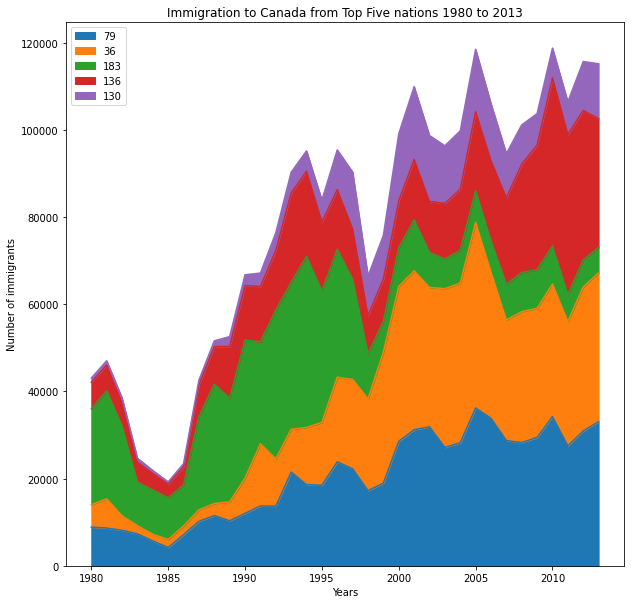

In [18]:
df_can.sort_values(by='Total', ascending=False, inplace=True, axis='index')

df_can.head()

dftop = df_can.head(5)

dftop

dftop = dftop[years]

dftop1 = dftop.transpose()


dftop1.plot(
    kind='area',
    figsize=(10,10)
)
plt.title('Immigration to Canada from Top Five nations 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

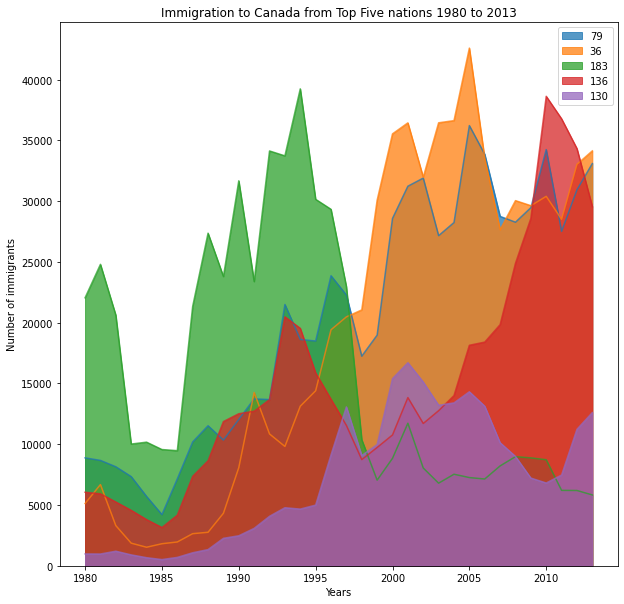

In [21]:
dftop1.plot(
    kind='area',
    figsize=(10,10),
    stacked=False,
    alpha=0.75   #for transparency - range is 0-1, default is 0.5
)
plt.title('Immigration to Canada from Top Five nations 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

#Lecture

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

np.random.seed(27)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
#-O All downloaded content is stored at filename
 
!wget -O train.csv https://www.upscfever.com/datasets/train_ML.csv
!wget -O test.csv https://www.upscfever.com/datasets/test_ML.csv

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

--2020-07-24 10:33:27--  https://www.upscfever.com/datasets/train_ML.csv
Resolving www.upscfever.com (www.upscfever.com)... 104.27.176.133, 104.27.177.133, 172.67.193.2, ...
Connecting to www.upscfever.com (www.upscfever.com)|104.27.176.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://upscfever.com/datasets/train_ML.csv [following]
--2020-07-24 10:33:27--  http://upscfever.com/datasets/train_ML.csv
Resolving upscfever.com (upscfever.com)... 104.27.177.133, 104.27.176.133, 172.67.193.2, ...
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://upscfever.com/datasets/train_ML.csv [following]
--2020-07-24 10:33:28--  https://upscfever.com/datasets/train_ML.csv
Connecting to upscfever.com (upscfever.com)|104.27.177.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘train.csv’

In [4]:
print('Train Shape: ', train.shape)

Train Shape:  (250, 302)


In [5]:
print('Test Shape: ', test.shape)

Test Shape:  (19750, 301)


In [6]:
#start

X_train = train.drop(['id','target'], axis='columns')
y_train = train['target']

X_test = test.drop(['id'], axis='columns')



In [7]:
#scaling -

scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [8]:
#model - starting point 

ridge = linear_model.Ridge()
lasso = linear_model.Lasso()


In [10]:
models = [ridge, lasso]

In [11]:
#hyper-parameters
#cross-validation: k-fold cross validation -
# we divide our data into k-parts
# data - a,b,c,d,e
#train - a,b,c,d and cv - e
#train - a,b,c,e and cv - d
#train - a,b,e,d and cv - c
#train - a,e,c,d and cv - b
#train - e,b,c,d and cv - a

def get_scores(model):
 scores = cross_val_score(model, X_train, y_train, cv=2, scoring='roc_auc')
 print('CV mean:', np.mean(scores))
 print('CV std:', np.std(scores))



In [12]:
for i in models:
 get_scores(i)

CV mean: 0.6659773517190397
CV std: 0.007606310995057763
CV mean: 0.5
CV std: 0.0


#PART 3

In [13]:
#ridge - alpha-0.1, fit_int=false, solver=auto, classwt=1-0.5,0-0.5
#ridge - alpha-0.1, fit_int=true, solver=auto, classwt=1-0.5,0-0.5
#ridge - alpha-0.1, fit_int=true, solver=auto, classwt=1-0.5,0-0.5

alpha = [0.5, 1]
solver = ['auto', 'svd']



param_grid = dict(alpha=alpha,
                  solver=solver)

grids = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)

grid_result = grids.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.7s finished


In [14]:
print('best score:', grid_result.best_score_)
print('best list of hyper-params:', grid_result.best_params_)


best score: 0.655320621373253
best list of hyper-params: {'alpha': 1, 'solver': 'auto'}


In [15]:
final_ridge = linear_model.Ridge(alpha= 1, solver= 'auto')

#PART 4

In [16]:
#Random search

alpha = [0.5, 1]
solver = ['auto', 'svd']


param_grid = dict(alpha=alpha,
                  solver=solver)

rnds = RandomizedSearchCV(estimator=ridge, param_distributions=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)

rnds_result = rnds.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished


In [17]:
print('best score:', rnds_result.best_score_)
print('best list of hyper-params:', rnds_result.best_params_)

best score: 0.655320621373253
best list of hyper-params: {'solver': 'auto', 'alpha': 1}


In [18]:
final_ridge_rnd = linear_model.Ridge(alpha= 1, solver= 'auto')

#PART 5

In [ ]:
ridge = linear_model.Ridge()
lasso= linear_model.Lasso()
elastic = linear_model.ElasticNet()
lasso_lars = linear_model.LassoLars()
bayes_ridge = linear_model.BayesianRidge()
logistics = linear_model.LogisticRegression()
sgd = linear_model.SGDClassifier()
passagg = linear_model.PassiveAggressiveClassifier()
ridgecv = linear_model.RidgeClassifierCV()
ridgeclass = linear_model.RidgeClassifier()
